In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import itertools as it

%config InlineBackend.figure_formats = ['svg']

output_dir = "prediction"

In [2]:
def retrieve_output(model="mlplr", constraint="spectral_radius", reg_coeff="-1", agg="regime"):

    param = f"{model}.{reg_coeff}.{constraint}"
    fname = os.path.join(output_dir, param, f"nll_per_{agg}.csv")
    if not os.path.exists(fname):
        return
    df = pd.read_csv(fname, index_col=0)
    
    df.rename(columns={'nll':f"{model}.{reg_coeff}.{constraint}"}, inplace=True)
    df = df.melt(id_vars=["regime", "genes_perturbed"], 
                   value_vars=[param, "nll_baseline_full_covar", "nll_baseline_diag_covar"],
                   var_name="model",
                   value_name="nll")
    return df
    df[['model', 'lasso coeff', 'constraint']] = df['model'].str.split('-')

In [3]:
constraint_methods = ["spectral_radius", "exp"]
reg_coeff_choices  = [-3, -2, -1, 0, 1, 2]

hyperparameter_sweep = [retrieve_output(model="mlplr", constraint=c, reg_coeff=r) 
                        for (c,r) 
                        in it.product(constraint_methods, reg_coeff_choices)]
hyperparameter_sweep = pd.concat(hyperparameter_sweep, axis=0).drop_duplicates().reset_index().drop('index', axis=1, inplace=False)
my_order = hyperparameter_sweep.groupby(["model"]).median().sort_values(by="nll").index

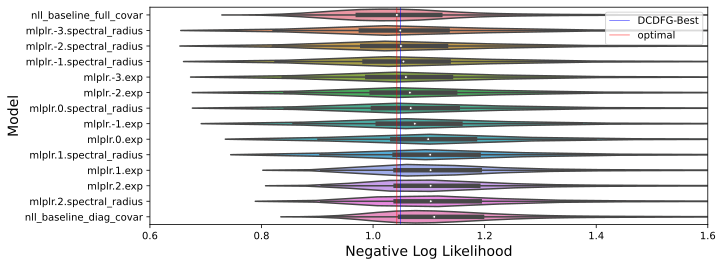

In [4]:
plt.figure(figsize=(10, 4))
sns.violinplot(data=hyperparameter_sweep, x="nll", y="model", order=my_order) 
plt.axvline(1.048726, 0, 1, linewidth=0.5, color='blue',label="DCDFG-Best")
plt.axvline(1.042655, 0, 1, linewidth=0.5, color='red', label="optimal")
plt.xlim(0.6, 1.6)
plt.legend()
plt.xlabel("Negative Log Likelihood", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.savefig("reproduced_hyperparameter_sweep.svg")

In [5]:
models = ["linear", "linearlr", "mlplr"]

figure5 = [retrieve_output(model=m, constraint="spectral_radius", reg_coeff=-1) for m in models]
figure5 = pd.concat(figure5, axis=0).drop_duplicates().reset_index().drop('index', axis=1, inplace=False)
my_order = figure5.groupby(["model"]).median().sort_values(by="nll").index

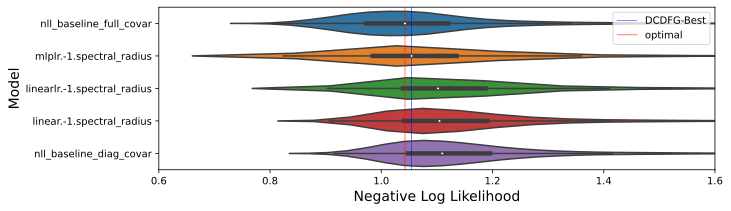

In [6]:
plt.figure(figsize=(10, 3))
sns.violinplot(data=figure5, x="nll", y="model", order=my_order) 
plt.axvline(1.054460, 0, 1, linewidth=0.5, color='blue', label="DCDFG-Best")
plt.axvline(1.042655, 0, 1, linewidth=0.5, color='red' , label="optimal")
plt.xlabel("Negative Log Likelihood", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.legend()
plt.xlim(0.6, 1.6)
plt.savefig("reproduced_figure5.svg")